In [1]:
import pdfplumber
from utils.ocr_utils import get_text_from_ocr_output
from utils.openai_functions import get_answer_from_simple_prompt

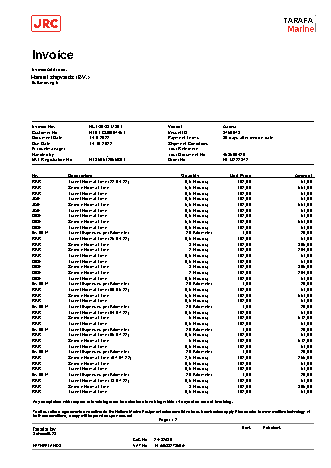

In [2]:
file_path = "../data/pdf_documents/TARAFA/Invoice.pdf"
page = 1
with pdfplumber.open(
    file_path
) as pdf:
    im = pdf.pages[page-1].to_image(resolution=40)
im

In [3]:
PROMPT = """
I will give you the output of an OCR system, run on a Purchase Order.
You will give me the PO number, the name of the vendor company, the name of the receiver company, and the PO total amount.
Answer in a JSON format. An example of answer is given below:
{
    "po_number": "4503500962",
    "vendor_name": "company1",
    "receiver_name": "company2",
    "total_amount": "1,000.00"
}
Here is the OCR output:
"""

file_path = "../data/ocr_results/TARAFA/Invoice.json"
# file_path = "../data/ocr_results/TARAFA/PO.json"
ocr_output_text = get_text_from_ocr_output(file_path)


predicted_fields = get_answer_from_simple_prompt(PROMPT + ocr_output_text)
print(predicted_fields)

{
    "po_number": "NL1J222372",
    "vendor_name": "TARAFA JRC Marine",
    "receiver_name": "Axima",
    "total_amount": "8,172.20"
}
